In [10]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()
    
%matplotlib inline

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2
from sympy.abc import A,B,t,f 
from sympy import re, im 

tlim = 6
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

## Topic 7 Example 6

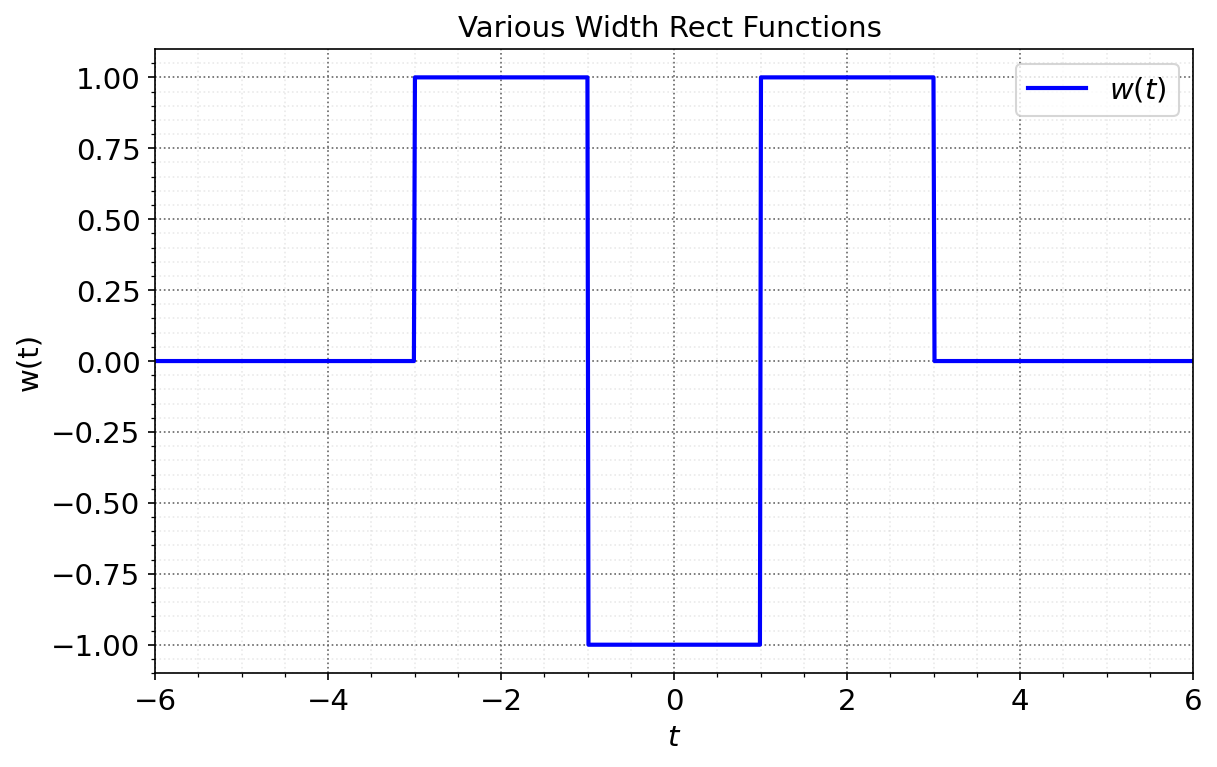

In [11]:
f1 = Piecewise((0, t <= -3),(1, t <= -1),(0, True))
f2 = Piecewise((0, t <= -1),(-1, t <= 1),(0, True))
f3 = Piecewise((0, t <= 1),(1, t <= 3),(0, True))

F1 = f1+f2+f3
lam_F1 = lambdify(ts, F1, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_F1(tt),'b',label='$w(t)$')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('w(t)')
plt.title('Various Width Rect Functions ')
plt.show()

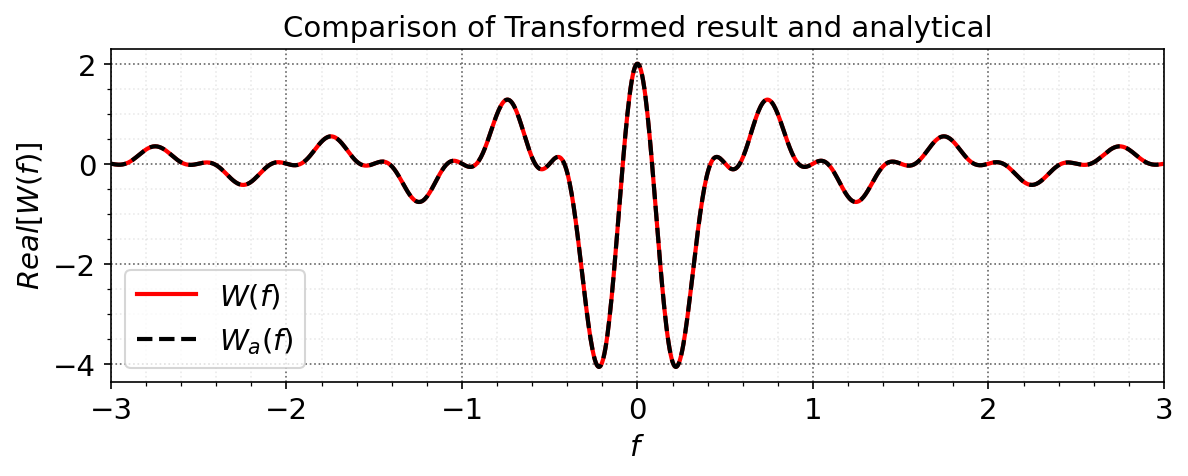

In [21]:
Q1 = fourier_transform(F1, t, f)
lam_Q1i = lambdify(f, im(Q1), modules=['numpy'])
lam_Q1r = lambdify(f, re(Q1), modules=['numpy'])

p = Symbol('p')
sincu = lambda f,p: sinc(p*np.pi*f) # swithc to sinc ftn that evetyone else uses...
# Predicted answer
QQ1 = 2*sincu(f,2)*(2*cos(4*np.pi*f)-1)
lam_QQ1r = lambdify(f, re(QQ1), modules=['numpy'])

fig, (ax1) = plt.subplots(1,1, figsize=(8,3), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q1r(ff),'r',label='$W(f)$')
ax1.plot(ff, lam_QQ1r(ff),'k--',label='$W_a(f)$')
ax1.set_ylabel('$Real[W(f)]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend()
nicegrid(ax1)
plt.title('Comparison of Transformed result and analytical')
plt.show()